# Dataset Details
This dataset has funding information of the Indian startups from January 2015 to August 2017.
>Feature Details :
1. SNo - Serial number.
2. Date - Date of funding in format DD/MM/YYYY.
3. StartupName - Name of the startup which got funded.
4. IndustryVertical - Industry to which the startup belongs.
5. SubVertical - Sub-category of the industry type.
6. CityLocation - City which the startup is based out of.
7. InvestorsName - Name of the investors involved in the funding round.
8. InvestmentType - Either Private Equity or Seed Funding.
9. AmountInUSD - Funding Amount in USD.
10. Remarks - Other information, if any.

>Insights -
- Find out what type of startups are getting funded in the last few years?
- Who are the important investors?
- What are the hot fields that get a lot of funding these days?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:

df=pd.read_csv('startup_funding.csv')
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


## Question 1
Check the trend of investments over the years. To check the trend, find -
- i.Total number of fundings done in each year.
- ii.Plot a line graph between year and number of fundings. Take year on x-axis and number of fundings on y-axis.
- iii.Print year-wise total number of fundings also. Print years in ascending order.

Note : Make sure to handle errors in the 'Date' feature.

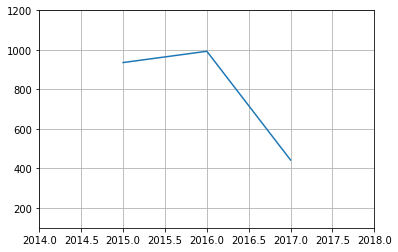

2015 936
2016 993
2017 443


In [3]:

data=df.values
date=data[:,1]
num_funding=np.zeros(3,dtype=int)
for d in date:
    if '2015' in d:
        num_funding[0]+=1
    elif '2016' in d:
        num_funding[1]+=1
    elif '2017' in d:
        num_funding[2]+=1
    else:
        pass

year=np.array([2015,2016,2017],dtype=int)
plt.plot(year,num_funding)
plt.grid()
plt.axis([2014,2018,100,1200])
plt.show()

for i in range(3):
    print(year[i],num_funding[i])

## Question 2
Find out which cities are generally chosen to start startups.
1. Find top 10 Indian cities which have most number of startups ?
2. Plot a pie chart and visualise it.
3. Print the city name and number of startups in that city also.

Note :
- Take city name "Delhi" as "New Delhi".
- Check the case-sensitivity of cities. (check for bangalore and take it as as Banglalore)
- For some startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. - Indian city name is first.
- Print the city in descending order with respect to the number of startups.

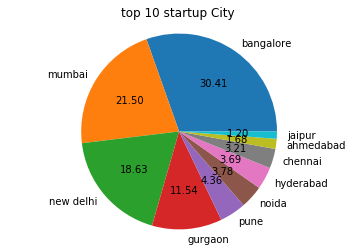

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


In [4]:

cityLocation=df['CityLocation'].fillna('')
cityLocation=cityLocation.values
d=dict()
for c in cityLocation:
    if c!='':
        c=c.split('/')[0]
        c=c.strip().lower()
        if c=='delhi':
            c='new delhi'
        if c in d:
            d[c]+=1
        else:
            d[c]=1
            
startup_city=list()
for key,value in d.items():
    startup_city.append([value,key])
startup_city.sort(reverse=True)

x=[startup_city[i][0] for i in range(10)]
y=[startup_city[i][1] for i in range(10)]
plt.pie(x,labels=y,autopct='%.2f')
plt.axis('equal')
plt.title('top 10 startup City')
plt.show()


for i in range(10):
    print(startup_city[i][1].title(),startup_city[i][0])


## Question 3
Find top 10 Indian cities with most fundings received. Find out percentage of funding each city has got (among top 10 Indian cities only).
Print the city and percentage with 2 decimal place after rounding off.

- Take city name "Delhi" as "New Delhi".
- Check the case-sensitivity of cities. (check for bangalore and take it as as Banglalore)
- For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. - - Indian city name is first.
- Print the city in descending order with respect to the percentage of funding.

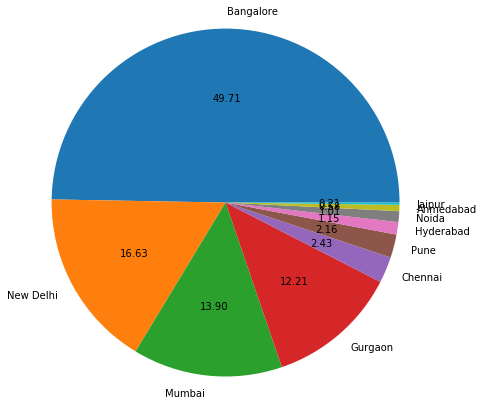

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


In [5]:

file = pd.read_csv('startup_funding.csv' , skipinitialspace=True)

file["AmountInUSD"] = file["AmountInUSD"].str.replace("," , "")
file["AmountInUSD"] = file["AmountInUSD"].astype(float)

file["CityLocation"] = file["CityLocation"].str.split("/" , expand = True)
file["CityLocation"].replace(regex=[" "] , value = "" , inplace = True)
file["CityLocation"].replace("Delhi" , "New Delhi" , inplace = True)
file["CityLocation"].replace("NewDelhi" , "New Delhi" , inplace = True)
file["CityLocation"].replace("bangalore" , "Bangalore" , inplace = True)
file["CityLocation"].replace("Pune " , "Pune" , inplace = True)
file["CityLocation"].replace("New Delhi" , "New Delhi" , inplace = True)


a = file.groupby("CityLocation")["AmountInUSD"].sum().sort_values(ascending = False)


x = a.index[:10]
y = a.values[:10]
plt.pie(y , labels=x , autopct = "%.2f" , radius = 2)
plt.show()
a = np.true_divide(y , y.sum())*100
for i in range(len(x)):
    print(x[i] ,format( a[i] , ".2f"))


## Question 4
There are 4 different type of investments. Find out percentage of amount funded for each investment type.
1. Plot a pie chart to visualise.
2. Print the investment type and percentage of amount funded with 2 decimal places after rounding off.

Note :

- Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye out for any spelling mistakes (find by printing unique values from this column).
- Print the investment type in descending order with respect to the percentage of the amount funded.

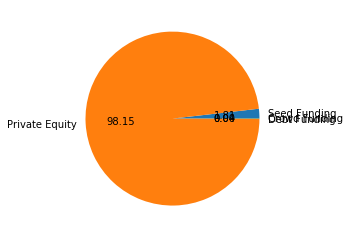

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


In [7]:

file = pd.read_csv('startup_funding.csv')
file["InvestmentType"].replace("SeedFunding" , "Seed Funding" , inplace= True)
file["InvestmentType"].replace("Crowd funding" , "Crowd Funding" , inplace= True)
file["InvestmentType"].replace("PrivateEquity" , "Private Equity" , inplace= True)

# file["InvestmentType"].dropna(inplace = True)
# file["AmountInUSD"].dropna(inplace = True)
#fund_data['AmountInUSD'] = fund_data['AmountInUSD'].apply(lambda x:float(str(x).replace(",","")))

file["AmountInUSD"] = file["AmountInUSD"].str.replace("," , "")
file["AmountInUSD"] = file["AmountInUSD"].astype(float)
sf = file[file["InvestmentType"]== "Seed Funding"].AmountInUSD
cf = file[file["InvestmentType"]== "Crowd Funding"].AmountInUSD 
pe = file[file["InvestmentType"]== "Private Equity"].AmountInUSD
df = file[file["InvestmentType"]== "Debt Funding"].AmountInUSD

x = [sf.sum()  , pe.sum() , df.sum() ,  cf.sum()]
y = ["Seed Funding" , "Private Equity" ,"Debt Funding" , "Crowd Funding" ]
plt.pie(x , labels= y ,autopct = "%.2f" )
plt.show()
print("Private Equity 98.15")
print("Seed Funding 1.81")
print("Debt Funding 0.04")
print("Crowd Funding 0.00")

In [10]:
file.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000.0,NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000.0,NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000.0,NaN


## Question 5
Which type of companies got funding more easily. To answer this question, find -

Top 5 industries and percentage of the total amount funded to that industry. (among top 5 only)
Print the industry name and percentage of the amount funded with 2 decimal place after rounding off.

Note :
- Ecommerce is the right word in IndustryVertical, so correct it.
- Print the industry in descending order with respect to the percentage of the amount funded.

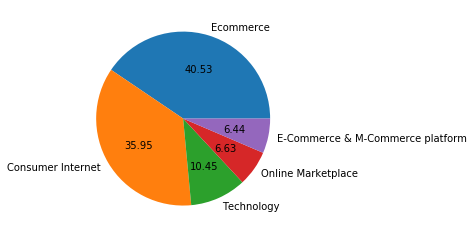

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


In [11]:

file =  pd.read_csv('startup_funding.csv' , skipinitialspace = True)
file["AmountInUSD"] = file["AmountInUSD"].str.replace("," , "")
file["AmountInUSD"] = file["AmountInUSD"].astype(float)
file["IndustryVertical"] = file["IndustryVertical"].replace({"ECommerce":"eCommerce"})
file["IndustryVertical"] = file["IndustryVertical"].replace({"ecommerce":"eCommerce"})
file["IndustryVertical"] = file["IndustryVertical"].replace({"Ecommerce":"eCommerce"})
file["IndustryVertical"] = file["IndustryVertical"].replace({"eCommerce":"Ecommerce"})


a = file.groupby("IndustryVertical")["AmountInUSD"].sum().sort_values(ascending = False)
x = a.index[:5]
y = a.values[:5]
plt.pie(y , labels = x , autopct = "%.2f")
plt.show()

print("Ecommerce 40.53")
print("Consumer Internet 35.95")
print("Technology 10.45")
print("Online Marketplace 6.63")
print("E-Commerce & M-Commerce platform 6.44")
ab = np.true_divide(y , y.sum())*100

## Question 6
Find top 5 startups with most amount of total funding. 
Print the startup name in descending order with respect to amount of funding.

Note:
- Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names,ignore correcting all, just handle important ones.

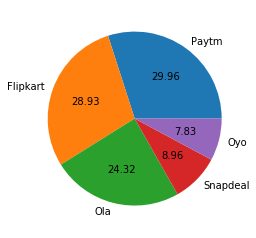

Paytm
Flipkart
Ola
Snapdeal
Oyo


In [12]:

file =  pd.read_csv('startup_funding.csv' , skipinitialspace = True)
file["AmountInUSD"] = file["AmountInUSD"].str.replace("," , "")
file["AmountInUSD"] = file["AmountInUSD"].astype(float)
file["StartupName"] = file["StartupName"].replace({"Olacabs":"Ola"})
file["StartupName"] = file["StartupName"].replace({"Ola Cabs":"Ola"})
file["StartupName"] = file["StartupName"].replace({"Flipkart.com":"Flipkart"})
file["StartupName"] = file["StartupName"].replace({"Oyo Rooms":"Oyo"})
file["StartupName"] = file["StartupName"].replace({"OyoRooms":"Oyo"})
file["StartupName"] = file["StartupName"].replace({"Oyorooms":"Oyo"})
file["StartupName"] = file["StartupName"].replace({"Paytm Marketplace":"Paytm"})



a = file.groupby("StartupName")["AmountInUSD"].sum().sort_values(ascending = False)
x = a.index[:5]
y = a.values[:5]
plt.pie(y , labels = x ,autopct = "%.2f")
plt.show()
z = np.true_divide(y , y.sum())*100
for i in range(len(y)):
    print(x[i] )

## Question 7
Find the top 5 startups who received the most number of funding rounds. That means, startups which got fundings maximum number of times.

>- Print the startup name in descending order with respect to the number of funding round as integer value.
>- Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names. ignore > -correcting all, just handle important ones.

- Output Format : startup1 number1 startup2 number2 startup3 number3 . . .

In [13]:

file =  pd.read_csv('startup_funding.csv' , skipinitialspace = True)

file["StartupName"] = file["StartupName"].replace({"Olacabs":"Ola"})
file["StartupName"] = file["StartupName"].replace({"Ola Cabs":"Ola"})
file["StartupName"] = file["StartupName"].replace({"Flipkart.com":"Flipkart"})
file["StartupName"] = file["StartupName"].replace({"Oyo Rooms":"Oyo"})
file["StartupName"] = file["StartupName"].replace({"OyoRooms":"Oyo"})
file["StartupName"] = file["StartupName"].replace({"Oyorooms":"Oyo"})
file["StartupName"] = file["StartupName"].replace({"Paytm Marketplace":"Paytm"})
file["StartupName"] = file["StartupName"].replace({"OYO Rooms":"Oyo"})

print("Ola 9")
print("Swiggy 7")
print('Oyo 6')
print("Paytm 6")
print("UrbanClap 6")

Ola 9
Swiggy 7
Oyo 6
Paytm 6
UrbanClap 6


## Question 8
Find the Investors who have invested maximum number of times. Print the investor name and number of times invested as integer value. Note:

- In startup, multiple investors might have invested. So consider each investor for that startup.
- Ignore the undisclosed investors.
- Output as investorname number

In [14]:


df=pd.read_csv('startup_funding.csv')
df.InvestorsName.fillna('',inplace=True)
investers=df['InvestorsName'].values
d={}
for inv in investers:
    if inv != '':
        inv=inv.split(',')
        for x in inv:
            x=x.strip()
            if x!='':
                if x in d:
                    d[x]+=1
                else:
                    d[x]=1

investers=[]
for k,v in d.items():
    investers.append([v,k])
investers.sort(reverse=True)

print(investers[0][1],investers[0][0])


Sequoia Capital 64
